<a href="https://www.kaggle.com/code/chakrabortyarnab/pre-processing-of-text-data?scriptVersionId=121385648" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv


## Abstract

Text preprocessing is a crucial step in natural language processing (NLP) that involves transforming raw text data into a structured format suitable for analysis. 

Text data frequently contains several types of noise, including punctuation, emotions, and text in various cases. These noise elements may adversely impact the performance of NLP models. To address this, text preprocessing techniques are employed to remove these noise elements and produce a clean dataset. 

Machines cannot understand words, they require numbers so we need to convert text to numbers in an efficient manner. 
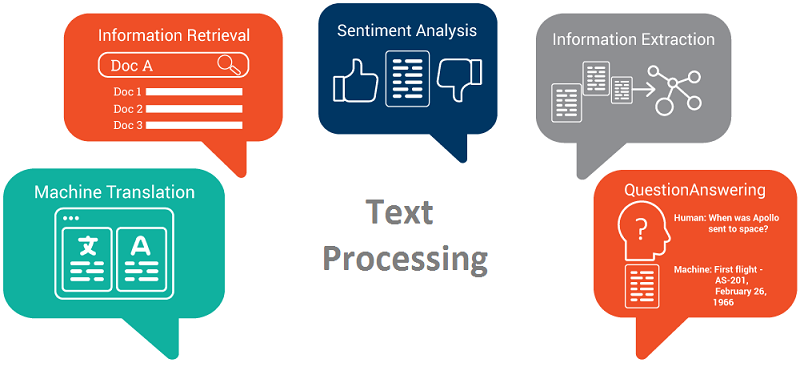

## Installing & Importing the Required Libraries

In [2]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 kB 9.1 MB/s eta 0:00:00


In [3]:
import nltk
import string
import re
import contractions
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords,wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [4]:
df = pd.read_csv("/kaggle/input/ecommerce-text-classification/ecommerceDataset.csv",names=['category','comment'])

<AxesSubplot:>

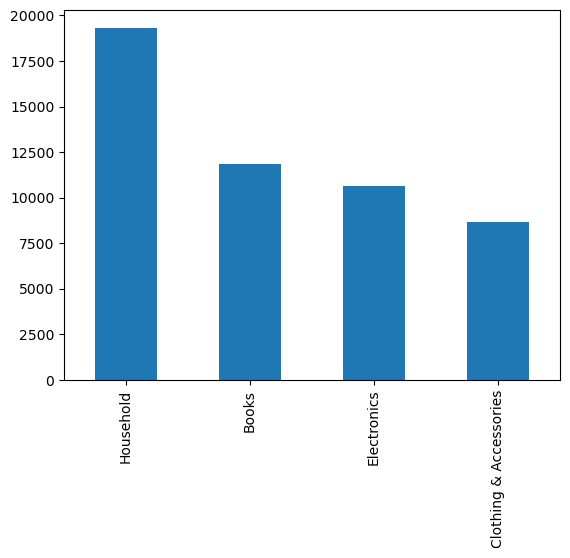

In [5]:
df['category'].value_counts().plot.bar()

In [6]:
df=df[:100]

In [7]:
df['comment'][0]

'Paper Plane Design Framed Wall Hanging Motivational Office Decor Art Prints (8.7 X 8.7 inch) - Set of 4 Painting made up in synthetic frame with uv textured print which gives multi effects and attracts towards it. This is an special series of paintings which makes your wall very beautiful and gives a royal touch. This painting is ready to hang, you would be proud to possess this unique painting that is a niche apart. We use only the most modern and efficient printing technology on our prints, with only the and inks and precision epson, roland and hp printers. This innovative hd printing technique results in durable and spectacular looking prints of the highest that last a lifetime. We print solely with top-notch 100% inks, to achieve brilliant and true colours. Due to their high level of uv resistance, our prints retain their beautiful colours for many years. Add colour and style to your living space with this digitally printed painting. Some are for pleasure and some for eternal blis

In [8]:
df.dropna(inplace=True)

## Expand Contraction
Contracted words are a common feature of natural language, especially in informal settings such as social media or messaging platforms.

Contractions are shortened versions of words or phrases that are formed by combining two words and replacing one or more letters with an apostrophe. 
Examples of contractions include:
* "can't" (from "cannot")
* "won't" (from "will not")
* "it's" (from "it is" or "it has")
* "shouldn't" (from "should not")
* "didn't" (from "did not")
* "you'll" (from "you will")

It will be beneficial to expand contractions to help with language understanding for which we will use the **Contractions** library.

In [9]:
df['contractions'] = df['comment'].apply(lambda x: [contractions.fix(word) for word in x.split()])
df['no_contractions'] = [' '.join(map(str, l)) for l in df['contractions']]
df.drop('contractions',axis=1,inplace=True)
df.head()

,category,comment,no_contractions
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...


## Remove Punctuations

Punctuation is often removed to simplify the analysis, and reduce the vocabulary size while preserving the meaningful content of the text.

We will use the **punctuation** library from the String package.

In [10]:
punc = string.punctuation
df['no_punc'] = df['no_contractions'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
df.head()

,category,comment,no_contractions,no_punc
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","SAF 'Floral' Framed Painting (Wood, 30 inch x ...",SAF Floral Framed Painting Wood 30 inch x 10 i...
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF UV Textured Modern Art Print Framed Painti...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","SAF Flower Print Framed Painting (Synthetic, 1...",SAF Flower Print Framed Painting Synthetic 135...
4,Household,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...


## Tokenization
Tokenization is the process of breaking down text into individual words, phrases, or other meaningful elements, called tokens.

We will use **NLTK.word_tokenize()** function to create a new column named “tokenized”.

In [11]:
nltk.download('punkt')
df['tokenized'] = df['no_punc'].apply(word_tokenize)
df.head()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,category,comment,no_contractions,no_punc,tokenized
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","SAF 'Floral' Framed Painting (Wood, 30 inch x ...",SAF Floral Framed Painting Wood 30 inch x 10 i...,"[SAF, Floral, Framed, Painting, Wood, 30, inch..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF UV Textured Modern Art Print Framed Painti...,"[SAF, UV, Textured, Modern, Art, Print, Framed..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","SAF Flower Print Framed Painting (Synthetic, 1...",SAF Flower Print Framed Painting Synthetic 135...,"[SAF, Flower, Print, Framed, Painting, Synthet..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt..."


## Convert to Lower Case

All the alphabetic characters in a text are transformed to their corresponding lower case representation to reduce the vocabulary size and avoid duplication of words during text analysis.

In [12]:
df['lower'] = df['tokenized'].apply(lambda x: [text.lower() for text in x])
df.head()

,category,comment,no_contractions,no_punc,tokenized,lower
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ...","[paper, plane, design, framed, wall, hanging, ..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","SAF 'Floral' Framed Painting (Wood, 30 inch x ...",SAF Floral Framed Painting Wood 30 inch x 10 i...,"[SAF, Floral, Framed, Painting, Wood, 30, inch...","[saf, floral, framed, painting, wood, 30, inch..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF UV Textured Modern Art Print Framed Painti...,"[SAF, UV, Textured, Modern, Art, Print, Framed...","[saf, uv, textured, modern, art, print, framed..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","SAF Flower Print Framed Painting (Synthetic, 1...",SAF Flower Print Framed Painting Synthetic 135...,"[SAF, Flower, Print, Framed, Painting, Synthet...","[saf, flower, print, framed, painting, synthet..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt...","[incredible, gifts, india, wooden, happy, birt..."


## Remove words containing digits

Eliminating words that contain numeric characters from text analysis to reduce noise and improve the accuracy of language models.

We will eliminate these words using **Regular Expression**.

In [13]:
df['no_num'] = df['lower'].apply(lambda x: [re.sub(r'\w*\d\w*','',text) for text in x])
df.head()

,category,comment,no_contractions,no_punc,tokenized,lower,no_num
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ...","[paper, plane, design, framed, wall, hanging, ...","[paper, plane, design, framed, wall, hanging, ..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","SAF 'Floral' Framed Painting (Wood, 30 inch x ...",SAF Floral Framed Painting Wood 30 inch x 10 i...,"[SAF, Floral, Framed, Painting, Wood, 30, inch...","[saf, floral, framed, painting, wood, 30, inch...","[saf, floral, framed, painting, wood, , inch, ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF UV Textured Modern Art Print Framed Painti...,"[SAF, UV, Textured, Modern, Art, Print, Framed...","[saf, uv, textured, modern, art, print, framed...","[saf, uv, textured, modern, art, print, framed..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","SAF Flower Print Framed Painting (Synthetic, 1...",SAF Flower Print Framed Painting Synthetic 135...,"[SAF, Flower, Print, Framed, Painting, Synthet...","[saf, flower, print, framed, painting, synthet...","[saf, flower, print, framed, painting, synthet..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt...","[incredible, gifts, india, wooden, happy, birt...","[incredible, gifts, india, wooden, happy, birt..."


## Remove Stopwords

Process of eliminating common words such as "the", "a", "an", and "in" from text to reduce the dimensionality of the data, and to focus on the more meaningful words that carry the essence of the text.

We will use the **stopwords** library from the nltk module.

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_num'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,comment,no_contractions,no_punc,tokenized,lower,no_num,stopwords_removed
0,Household,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...,Paper Plane Design Framed Wall Hanging Motivat...,"[Paper, Plane, Design, Framed, Wall, Hanging, ...","[paper, plane, design, framed, wall, hanging, ...","[paper, plane, design, framed, wall, hanging, ...","[paper, plane, design, framed, wall, hanging, ..."
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","SAF 'Floral' Framed Painting (Wood, 30 inch x ...",SAF Floral Framed Painting Wood 30 inch x 10 i...,"[SAF, Floral, Framed, Painting, Wood, 30, inch...","[saf, floral, framed, painting, wood, 30, inch...","[saf, floral, framed, painting, wood, , inch, ...","[saf, floral, framed, painting, wood, , inch, ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF 'UV Textured Modern Art Print Framed' Pain...,SAF UV Textured Modern Art Print Framed Painti...,"[SAF, UV, Textured, Modern, Art, Print, Framed...","[saf, uv, textured, modern, art, print, framed...","[saf, uv, textured, modern, art, print, framed...","[saf, uv, textured, modern, art, print, framed..."
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1...","SAF Flower Print Framed Painting (Synthetic, 1...",SAF Flower Print Framed Painting Synthetic 135...,"[SAF, Flower, Print, Framed, Painting, Synthet...","[saf, flower, print, framed, painting, synthet...","[saf, flower, print, framed, painting, synthet...","[saf, flower, print, framed, painting, synthet..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...,Incredible Gifts India Wooden Happy Birthday U...,"[Incredible, Gifts, India, Wooden, Happy, Birt...","[incredible, gifts, india, wooden, happy, birt...","[incredible, gifts, india, wooden, happy, birt...","[incredible, gifts, india, wooden, happy, birt..."


## Stemming or Lemmatization
Stemming and lemmatization are two techniques used in NLP to normalize words by reducing them to their base or root form; stemming chops off the end of words, while lemmatization uses a vocabulary and morphological analysis to reduce words to their canonical form.

* **Stemming**: The stem of "running" is "run". Using a stemming algorithm, "running", "runs", and "runner" would all be reduced to the stem "run".
* **Lemmatization**: The lemma of "running" is "run". Using a lemmatization algorithm, "running" and "runs" would be reduced to "run", while "runner" would be reduced to "run" as well, but only if the context suggests that it is being used as a verb.

We will apply parts of **speech tags**, in other words, determine the part of speech (ie. noun, verb, adverb, etc.) for each word.

There are various stemmers and one lemmatizer in NLTK, the most common being:

* Porter Stemmer from Porter (1980)
* Wordnet Lemmatizer (port of the Morphy: https://wordnet.princeton.edu/man/morphy.7WN.html)

**Action:** We will apply NLTK’s Porter Stemmer within our trusty list comprehension.

In [15]:
stemmer = PorterStemmer()
df['stem'] = df['stopwords_removed'].apply(lambda x: [stemmer.stem(word) for word in x])

## Displaying the original text and processed data

In [16]:
df[['comment','stem']]

,comment,stem
0,Paper Plane Design Framed Wall Hanging Motivat...,"[paper, plane, design, frame, wall, hang, moti..."
1,"SAF 'Floral' Framed Painting (Wood, 30 inch x ...","[saf, floral, frame, paint, wood, , inch, x, ,..."
2,SAF 'UV Textured Modern Art Print Framed' Pain...,"[saf, uv, textur, modern, art, print, frame, p..."
3,"SAF Flower Print Framed Painting (Synthetic, 1...","[saf, flower, print, frame, paint, synthet, , ..."
4,Incredible Gifts India Wooden Happy Birthday U...,"[incred, gift, india, wooden, happi, birthday,..."
...,...,...
95,Embroiderymaterial Aari Embroidery Needles for...,"[embroiderymateri, aari, embroideri, needl, be..."
96,Imported Universal Quilting Embroidery Presser...,"[import, univers, quilt, embroideri, presser, ..."
97,Am Wooden Embroidery Hoop/Frame for Crafters &...,"[wooden, embroideri, hoopfram, crafter, design..."
98,Sewn Golden Colour Seed Beads For Embroidery/S...,"[sewn, golden, colour, seed, bead, embroiderys..."
